In [ ]:
#Se importan las librerias de interés
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns
#Se instala spacy
!pip install -U spacy
!python -m spacy download es_core_news_sm
import spacy
nlp = spacy.load("es_core_news_sm")
import unicodedata
import re
#Se descargan los recursos para los stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
!pip install emoji
import emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 98.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MAESTRIA/PLN/tuits_cambio_climatico.csv')
print(df.head())
print(f'filas: {df.shape[0]}')
print(f'columnas: {df.shape[1]}')

#propiedades del objeto
df.info()


                                                tuit
0  Excelente iniciativa de el uso de energías ren...
1  Inspirador que la contaminación plástica afect...
2  Datos muestran que los niveles de CO2 disminuy...
3  Indignante que las temperaturas globales sigan...
4  Inspirador que la deforestación continúe 🌊 #So...
filas: 500
columnas: 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tuit    500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [ ]:
#PROCESAMIENTO DE LOS TEXTOS Y CONCATENACIÓN PARA EL ANALISIS
#primero se concatenan todas las filas del dataframe en un solo string de nombre 'textop'
textop=df['tuit'].str.cat(sep=' ')
def procesar_texto(textop):

  print(type(textop)) #se verifica el tipo resultante, que sea el correcto.
  texto=emoji.demojize(textop, language='es')#se transforman los emojis a texto:
  texto = texto.replace(":", " ")   #quita los dos puntos que rodean el nombre del emoji
  texto = texto.replace("_", " ")   #convierte face_with_tears a face with tears por ejemplo
  texto=re.sub(r'#([^\s]+)', r' \1 ', texto)#se separan los hashtags en distintas palabras:
  #ahora se separan las palabras por cada mayuscula que aparezca:
  texto=re.sub(r'([a-z])([A-Z])', r'\1 \2', texto)
  texto = re.sub(r'https?://\S+|www\.\S+', ' ', texto)  #quitar URLs
  texto = re.sub(r'\S+@\S+', ' ', texto)#quitar emails
  # quitar menciones @usuario
  texto = re.sub(r'@\w+', ' ', texto)
  texto_min=texto.lower()#Se minimiza
  return texto_min



#===================================================================================================
def tokenizacion(texto_min):
  #texto_min=procesar_texto(textop)
  #se tokeniza
  tokens=word_tokenize(texto_min, language='spanish')
  stop_words=set(stopwords.words('spanish'))
  #se agrega una lista con stopwords
  stop_a_remover=['revela', 'continúe', 'excelente','bueno', 'increíblemente','informa',
                  'sigan', 'alegra', 'indican', 'ver', 'muestran', 'según', 'implementen','uso'
                  ,'globo', 'america','corazon', 'alentador', 'marca', 'crezca', 'cruz'
                  ,'joven', 'corazón','mostrando']
  for i in stop_a_remover:
    stop_words.add(i)
  texto_tok=[word for word in tokens if word not in stop_words and word.isalpha()]
  #se imprime el wordcloud de texto_tok
  cleaned_text_tok=' '.join(texto_tok)

  try:
    cleaned_text_tok=cleaned_text_tok.split()
  except:
    pass
  return cleaned_text_tok

#Función para remover acentos==========================================================================
def sin_acentos(word):
    nfkd = unicodedata.normalize("NFKD", word)
    return "".join([p for p in nfkd if not unicodedata.combining(p)])

#Función para quitar los signos===========================================================================
def quitar_signos(cleaned_text_tok):
  lista_tokens = []
  for tok in cleaned_text_tok:
      # quitar signos
      tok = re.sub(r'[^a-zA-Z0-9áéíóúüñÁÉÍÓÚÜÑ]', '', tok)
      # quitar acentos
      tok = sin_acentos(tok)
      if tok:  # solo agregar si no quedó vacío
          lista_tokens.append(tok)

  #No se lematiza porque cambia el sentido de las palabras radicalmente
  palabras_tuit=' '.join(lista_tokens)
  return palabras_tuit


#========================================================================
def frecuencia_palabras_df(palabras_tuit):
  #frecuencia de palabras con seaborn (considero que es más estético que matplotlib)
  conteo=Counter(palabras_tuit.split())
  df_palabras=pd.DataFrame(conteo.most_common(20), columns=['palabra', 'frecuencia']) #aqui se crea el dataframe con las 10 mas comunes para graficarlo
  return df_palabras

#se crea la grafica:
def grafica_palabras(df_palabras):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='frecuencia', y='palabra', data=df_palabras, palette='viridis', hue='palabra') #seaborn
  plt.title('Frecuencia de las 20 Palabras más Comunes', size=15, fontweight='bold')
  plt.xlabel('Frecuencia')
  plt.ylabel('Palabras en los tuits')
  plt.show()

#======================================================================================================
def wordcloud(texto, titulo): #función para el wordcloud
  plt.figure(figsize=(20,10))
  wordcloud=WordCloud(width=800, height=500, background_color='white', collocations=False).generate(texto)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(titulo, size=15, fontweight='bold')
  plt.show()

textop=procesar_texto(textop)
cleaned_text_tok=tokenizacion(textop)
palabras_tuit=quitar_signos(cleaned_text_tok)
df_palabras=frecuencia_palabras_df(palabras_tuit)

<class 'str'>


#20 Palabras mas repetidas

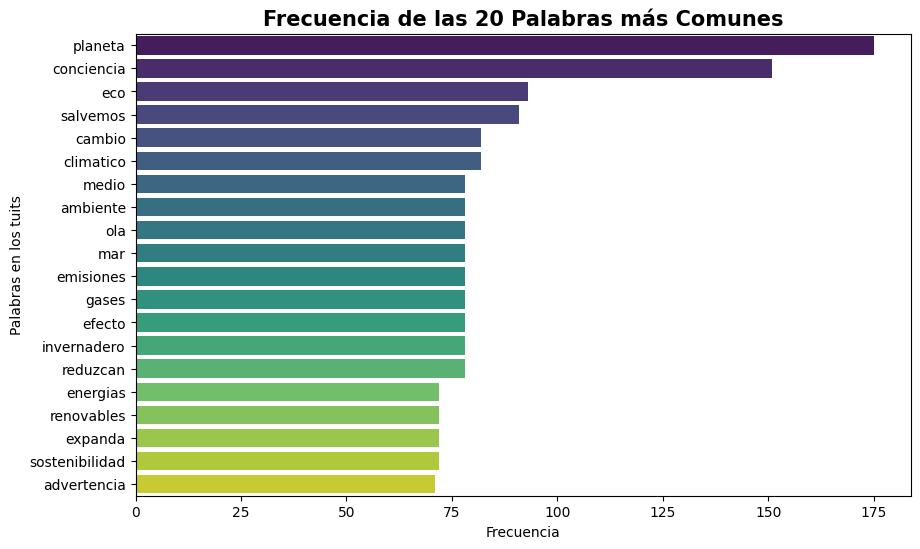

In [ ]:
grafica_palabras(df_palabras)

# Nube de palabras

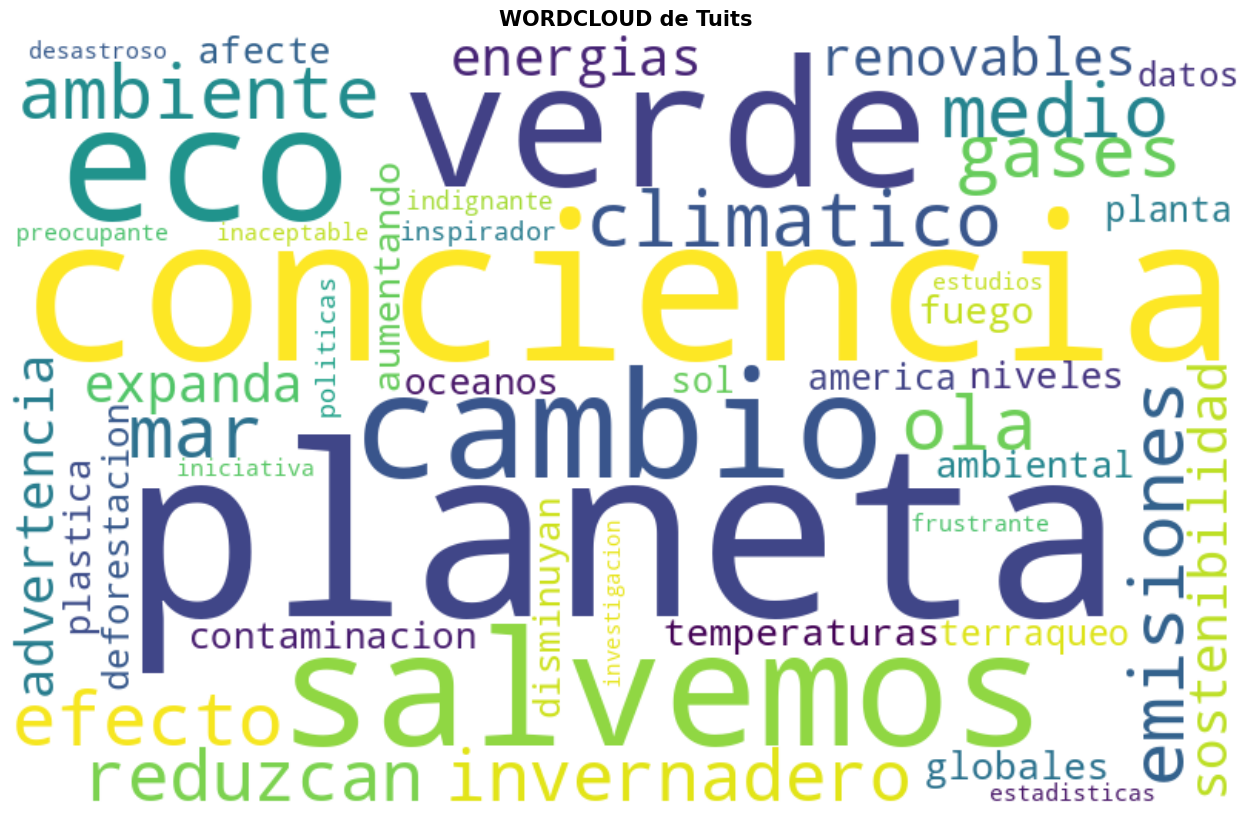

In [ ]:
wordcloud(palabras_tuit, 'WORDCLOUD de Tuits')

**ENLACE A LA ACTIVIDAD EN GOOGLE COLAB:**

https://colab.research.google.com/drive/1WZTmKeSR7xG79G-FkLfKqpS1wcKUPk-m?usp=sharing